In [1]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

Class Proportions:
Non_Monkeypox: 619 Monkeypox: 697


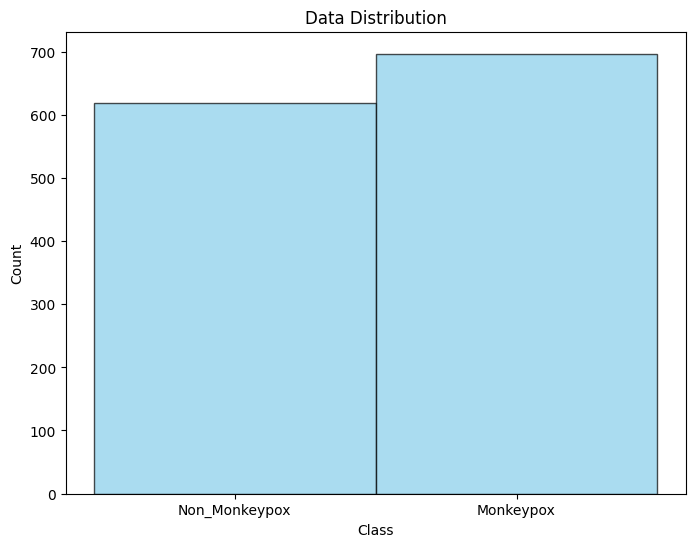

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-47/Downloads/0Sukadha/1325_images"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Monkeypox and Non_Monkeypox)
for class_name in ['Non_Monkeypox', 'Monkeypox']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Non_Monkeypox, 1 for Monkeypox) to the labels list
        labels.append(0 if class_name == 'Non_Monkeypox' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Non_Monkeypox:", np.sum(labels == 0), "Monkeypox:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


In [3]:
# Balance the dataset with 600 images from each class (Non_Monkeypox and Monkeypox)
non_monkeypox_images = images[labels == 0][:600]
monkeypox_images = images[labels == 1][:600]
non_monkeypox_labels = labels[labels == 0][:600]
monkeypox_labels = labels[labels == 1][:600]

# Concatenate the data back together
balanced_images = np.concatenate([non_monkeypox_images, monkeypox_images])
balanced_labels = np.concatenate([non_monkeypox_labels, monkeypox_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Non_Monkeypox Images:", non_monkeypox_images.shape)
print("Monkeypox Images:", monkeypox_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Non_Monkeypox Images: (600, 224, 224)
Monkeypox Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


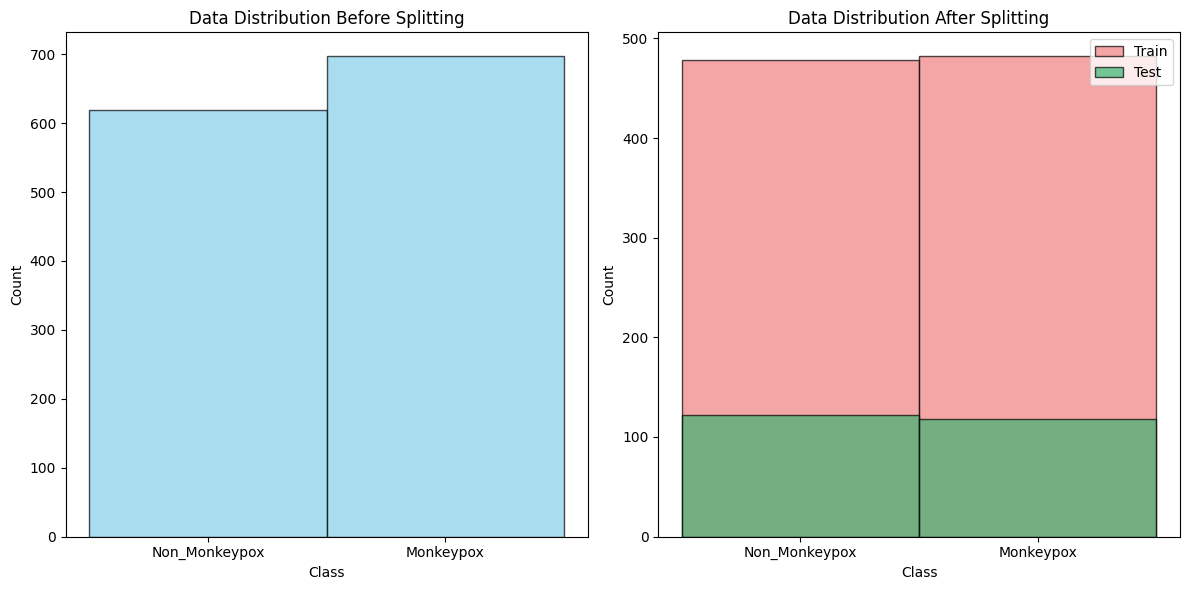

In [4]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))

# Before splitting (Original data)
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# After splitting (Train and Test sets)
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
from collections import Counter

def check_dataset_balance(labels):
    # Count the occurrences of each class label
    label_counts = Counter(labels)

    # Print the counts for each class
    print("Class distribution in the dataset:")
    for label, count in label_counts.items():
        class_name = "Monkeypox" if label == 1 else "Non_Monkeypox"
        print(f"{class_name}: {count} images")

    # Check if the dataset is balanced
    counts = list(label_counts.values())
    min_count = min(counts)
    max_count = max(counts)

    is_balanced = min_count == max_count

    if is_balanced:
        print("The dataset is balanced.")
    else:
        print("The dataset is not balanced.")
        print(f"Minimum count: {min_count}, Maximum count: {max_count}")

# Call the function with balanced_labels
check_dataset_balance(balanced_labels)


Class distribution in the dataset:
Non_Monkeypox: 600 images
Monkeypox: 600 images
The dataset is balanced.


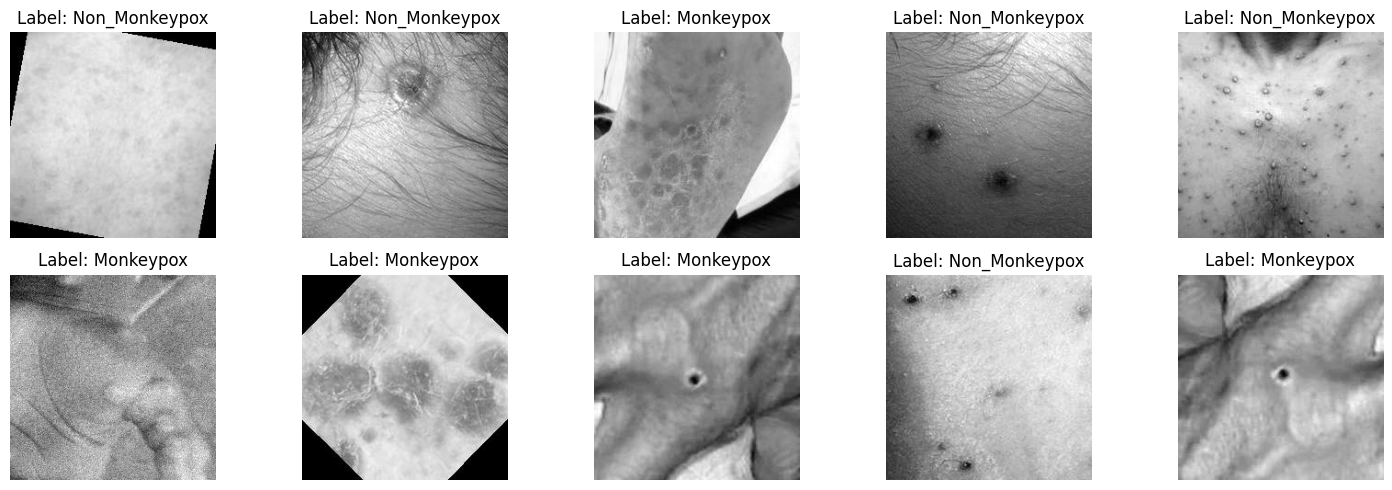

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {"Monkeypox" if label == 1 else "Non_Monkeypox"}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


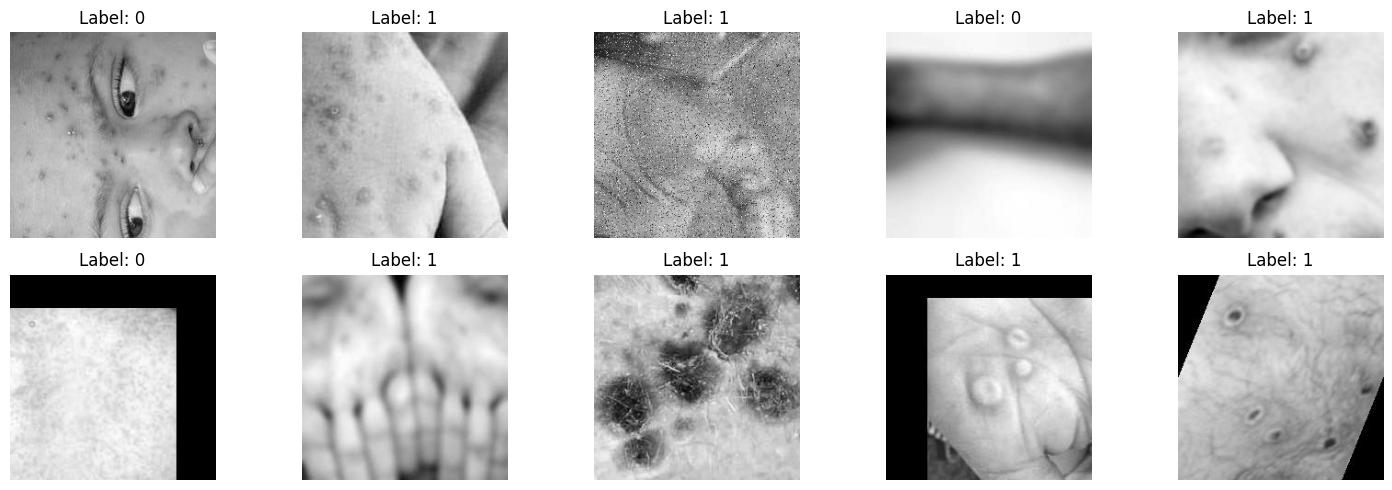

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


In [8]:
images[0]

array([[0.08235294, 0.09803922, 0.10196079, ..., 0.67058825, 0.65882355,
        0.7019608 ],
       [0.08235294, 0.09803922, 0.10588235, ..., 0.68235296, 0.6509804 ,
        0.6784314 ],
       [0.08627451, 0.10196079, 0.10980392, ..., 0.6901961 , 0.6666667 ,
        0.6901961 ],
       ...,
       [0.3882353 , 0.48235294, 0.5294118 , ..., 0.3529412 , 0.36862746,
        0.3647059 ],
       [0.39215687, 0.5019608 , 0.54509807, ..., 0.3764706 , 0.38039216,
        0.3529412 ],
       [0.42352942, 0.5372549 , 0.5764706 , ..., 0.40392157, 0.39215687,
        0.34509805]], dtype=float32)

# HistGradientBoostingClassifier

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 418ms/step - accuracy: 0.6218 - auc: 0.6521 - auc_1: 0.6416 - loss: 7.7808 - precision: 0.6328 - recall: 0.6574 - val_accuracy: 0.8417 - val_auc: 0.8978 - val_auc_1: 0.8986 - val_loss: 1.0807 - val_precision: 0.8571 - val_recall: 0.8136
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 355ms/step - accuracy: 0.9104 - auc: 0.9401 - auc_1: 0.9281 - loss: 0.6317 - precision: 0.9182 - recall: 0.9051 - val_accuracy: 0.8708 - val_auc: 0.9388 - val_auc_1: 0.9162 - val_loss: 0.5332 - val_precision: 0.8850 - val_recall: 0.8475
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.9540 - auc: 0.9893 - auc_1: 0.9868 - loss: 0.1564 - precision: 0.9379 - recall: 0.9740 - val_accuracy: 0.8875 - val_auc: 0.9502 - val_auc_1: 0.9500 - val_loss: 0.3642 - val_precision: 0.8957 - val_recall: 0.8729
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.9667 - auc: 0.9930 - auc_1: 0.9896 - loss: 0.0973 - precision: 0.9744 - recall: 0.9580 - val_acc

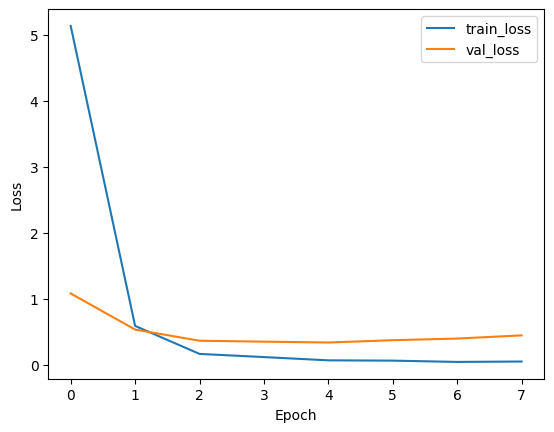

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.8709 - auc: 0.9400 - auc_1: 0.8924 - loss: 0.4484 - precision: 0.8519 - recall: 0.8505
Test Accuracy: 89.17%
Precision: 0.90
Recall: 0.88
AUC-ROC: 0.96
AUC-PR: 0.94
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step
Confusion Matrix:
[[110  12]
 [ 14 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       122
           1       0.90      0.88      0.89       118

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240

AUC Score: 0.89
Precision: 0.90
Recall: 0.88
F1 Score: 0.89
PR AUC: 0.92
Cohen's Kappa Coefficient: 0.78
Matthews Correlation Coefficient (MCC): 0.78
Balanced Accuracy: 0.89


In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Train HistGradientBoostingClassifier
# First, we flatten the image data to pass it to the HistGradientBoostingClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train_flat, y_train)

# Predict using the HistGradientBoostingClassifier
hgbc_predictions = hgbc.predict(X_test_flat)

# Evaluate the HistGradientBoostingClassifier
hgbc_conf_matrix = confusion_matrix(y_test, hgbc_predictions)
print("HistGradientBoosting Confusion Matrix:")
print(hgbc_conf_matrix)

# Generate classification report for HistGradientBoostingClassifier
print("HistGradientBoosting Classification Report:")
print(classification_report(y_test, hgbc_predictions))

# ROC curve for HistGradientBoostingClassifier
hgbc_fpr, hgbc_tpr, _ = roc_curve(y_test, hgbc_predictions)
hgbc_roc_auc = roc_auc_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting AUC Score: {hgbc_roc_auc:.2f}')

# Precision and Recall for HistGradientBoostingClassifier
hgbc_precision = precision_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting Precision: {hgbc_precision:.2f}')

hgbc_recall = recall_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting Recall: {hgbc_recall:.2f}')

# F1 Score for HistGradientBoostingClassifier
hgbc_f1 = f1_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting F1 Score: {hgbc_f1:.2f}')

# Precision-Recall curve and PR AUC for HistGradientBoostingClassifier
hgbc_precision, hgbc_recall, _ = precision_recall_curve(y_test, hgbc_predictions)
hgbc_pr_auc = auc(hgbc_recall, hgbc_precision)
print(f'HistGradientBoosting PR AUC: {hgbc_pr_auc:.2f}')

# Cohen's Kappa Coefficient for HistGradientBoostingClassifier
hgbc_kappa = cohen_kappa_score(y_test, hgbc_predictions)
print(f"HistGradientBoosting Cohen's Kappa: {hgbc_kappa:.2f}")

# Matthews Correlation Coefficient for HistGradientBoostingClassifier
hgbc_mcc = matthews_corrcoef(y_test, hgbc_predictions)
print(f"HistGradientBoosting MCC: {hgbc_mcc:.2f}")

# Balanced Accuracy for HistGradientBoostingClassifier
hgbc_balanced_accuracy = balanced_accuracy_score(y_test, hgbc_predictions)
print(f"HistGradientBoosting Balanced Accuracy: {hgbc_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


2024-12-10 15:09:30.221802: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 15:09:30.226475: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:09:30.268907: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:09:30.325586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 15:09:30.367986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 419ms/step - accuracy: 0.6520 - auc: 0.6722 - auc_1: 0.6468 - loss: 7.5464 - precision: 0.6489 - recall: 0.6577 - val_accuracy: 0.8500 - val_auc: 0.9035 - val_auc_1: 0.8616 - val_loss: 1.0175 - val_precision: 0.8203 - val_recall: 0.8898
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 355ms/step - accuracy: 0.8938 - auc: 0.9414 - auc_1: 0.9380 - loss: 0.5810 - precision: 0.9053 - recall: 0.8891 - val_accuracy: 0.8833 - val_auc: 0.9498 - val_auc_1: 0.9568 - val_loss: 0.5364 - val_precision: 0.9500 - val_recall: 0.8051
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 0.9454 - auc: 0.9861 - auc_1: 0.9822 - loss: 0.1601 - precision: 0.9442 - recall: 0.9468 - val_accuracy: 0.9000 - val_auc: 0.9446 - val_auc_1: 0.9141 - val_loss: 0.4267 - val_precision: 0.8615 - val_recall: 0.9492
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - accuracy: 0.9569 - auc: 0.9918 - auc_1: 0.9891 - loss: 0.1121 - precision: 0.9589 - recall: 0.9520 - val

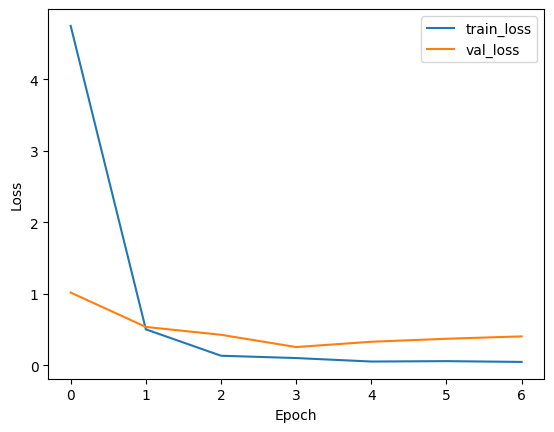

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.8989 - auc: 0.9491 - auc_1: 0.9460 - loss: 0.3270 - precision: 0.8931 - recall: 0.8698
Test Accuracy: 91.67%
Precision: 0.92
Recall: 0.92
AUC-ROC: 0.97
AUC-PR: 0.97
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 435ms/step
Confusion Matrix:
[[112  10]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       122
           1       0.92      0.92      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

AUC Score: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
PR AUC: 0.94
Cohen's Kappa Coefficient: 0.83
Matthews Correlation Coefficient (MCC): 0.83
Balanced Accuracy: 0.92


KeyboardInterrupt: 

In [10]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Train HistGradientBoostingClassifier
# First, we flatten the image data to pass it to the HistGradientBoostingClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train_flat, y_train)

# Predict using the HistGradientBoostingClassifier
hgbc_predictions = hgbc.predict(X_test_flat)

# Evaluate the HistGradientBoostingClassifier
hgbc_conf_matrix = confusion_matrix(y_test, hgbc_predictions)
print("HistGradientBoosting Confusion Matrix:")
print(hgbc_conf_matrix)

# Generate classification report for HistGradientBoostingClassifier
print("HistGradientBoosting Classification Report:")
print(classification_report(y_test, hgbc_predictions))

# ROC curve for HistGradientBoostingClassifier
hgbc_fpr, hgbc_tpr, _ = roc_curve(y_test, hgbc_predictions)
hgbc_roc_auc = roc_auc_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting AUC Score: {hgbc_roc_auc:.2f}')

# Precision and Recall for HistGradientBoostingClassifier
hgbc_precision = precision_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting Precision: {hgbc_precision:.2f}')

hgbc_recall = recall_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting Recall: {hgbc_recall:.2f}')

# F1 Score for HistGradientBoostingClassifier
hgbc_f1 = f1_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting F1 Score: {hgbc_f1:.2f}')

# Precision-Recall curve and PR AUC for HistGradientBoostingClassifier
hgbc_precision, hgbc_recall, _ = precision_recall_curve(y_test, hgbc_predictions)
hgbc_pr_auc = auc(hgbc_recall, hgbc_precision)
print(f'HistGradientBoosting PR AUC: {hgbc_pr_auc:.2f}')

# Cohen's Kappa Coefficient for HistGradientBoostingClassifier
hgbc_kappa = cohen_kappa_score(y_test, hgbc_predictions)
print(f"HistGradientBoosting Cohen's Kappa: {hgbc_kappa:.2f}")

# Matthews Correlation Coefficient for HistGradientBoostingClassifier
hgbc_mcc = matthews_corrcoef(y_test, hgbc_predictions)
print(f"HistGradientBoosting MCC: {hgbc_mcc:.2f}")

# Balanced Accuracy for HistGradientBoostingClassifier
hgbc_balanced_accuracy = balanced_accuracy_score(y_test, hgbc_predictions)
print(f"HistGradientBoosting Balanced Accuracy: {hgbc_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 436ms/step - accuracy: 0.6695 - auc_2: 0.6849 - auc_3: 0.6573 - loss: 3.9183 - precision_1: 0.6682 - recall_1: 0.6716 - val_accuracy: 0.8208 - val_auc_2: 0.8670 - val_auc_3: 0.8163 - val_loss: 2.0154 - val_precision_1: 0.7778 - val_recall_1: 0.8898
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.8681 - auc_2: 0.9008 - auc_3: 0.8743 - loss: 1.2449 - precision_1: 0.8703 - recall_1: 0.8710 - val_accuracy: 0.8542 - val_auc_2: 0.8881 - val_auc_3: 0.8866 - val_loss: 1.4828 - val_precision_1: 0.9278 - val_recall_1: 0.7627
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.8863 - auc_2: 0.9342 - auc_3: 0.9359 - loss: 0.8762 - precision_1: 0.9268 - recall_1: 0.8527 - val_accuracy: 0.8917 - val_auc_2: 0.9331 - val_auc_3: 0.9113 - val_loss: 0.7450 - val_precision_1: 0.9035 - val_recall_1: 0.8729
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.9669 - auc_2: 0.9864 - auc_3: 0.9883 - loss: 0.1942 - pr

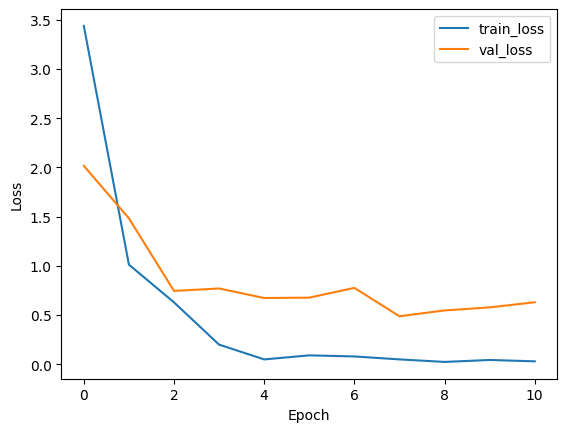

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.8955 - auc_2: 0.9388 - auc_3: 0.8921 - loss: 0.6239 - precision_1: 0.8680 - recall_1: 0.8958
Test Accuracy: 90.83%
Precision: 0.90
Recall: 0.92
AUC-ROC: 0.95
AUC-PR: 0.92
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step
Confusion Matrix:
[[110  12]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       122
           1       0.90      0.92      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240

AUC Score: 0.91
Precision: 0.90
Recall: 0.92
F1 Score: 0.91
PR AUC: 0.93
Cohen's Kappa Coefficient: 0.82
Matthews Correlation Coefficient (MCC): 0.82
Balanced Accuracy: 0.91


In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Train HistGradientBoostingClassifier
# First, we flatten the image data to pass it to the HistGradientBoostingClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train_flat, y_train)

# Predict using the HistGradientBoostingClassifier
hgbc_predictions = hgbc.predict(X_test_flat)

# Evaluate the HistGradientBoostingClassifier
hgbc_conf_matrix = confusion_matrix(y_test, hgbc_predictions)
print("HistGradientBoosting Confusion Matrix:")
print(hgbc_conf_matrix)

# Generate classification report for HistGradientBoostingClassifier
print("HistGradientBoosting Classification Report:")
print(classification_report(y_test, hgbc_predictions))

# ROC curve for HistGradientBoostingClassifier
hgbc_fpr, hgbc_tpr, _ = roc_curve(y_test, hgbc_predictions)
hgbc_roc_auc = roc_auc_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting AUC Score: {hgbc_roc_auc:.2f}')

# Precision and Recall for HistGradientBoostingClassifier
hgbc_precision = precision_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting Precision: {hgbc_precision:.2f}')

hgbc_recall = recall_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting Recall: {hgbc_recall:.2f}')

# F1 Score for HistGradientBoostingClassifier
hgbc_f1 = f1_score(y_test, hgbc_predictions)
print(f'HistGradientBoosting F1 Score: {hgbc_f1:.2f}')

# Precision-Recall curve and PR AUC for HistGradientBoostingClassifier
hgbc_precision, hgbc_recall, _ = precision_recall_curve(y_test, hgbc_predictions)
hgbc_pr_auc = auc(hgbc_recall, hgbc_precision)
print(f'HistGradientBoosting PR AUC: {hgbc_pr_auc:.2f}')

# Cohen's Kappa Coefficient for HistGradientBoostingClassifier
hgbc_kappa = cohen_kappa_score(y_test, hgbc_predictions)
print(f"HistGradientBoosting Cohen's Kappa: {hgbc_kappa:.2f}")

# Matthews Correlation Coefficient for HistGradientBoostingClassifier
hgbc_mcc = matthews_corrcoef(y_test, hgbc_predictions)
print(f"HistGradientBoosting MCC: {hgbc_mcc:.2f}")

# Balanced Accuracy for HistGradientBoostingClassifier
hgbc_balanced_accuracy = balanced_accuracy_score(y_test, hgbc_predictions)
print(f"HistGradientBoosting Balanced Accuracy: {hgbc_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


XGBoosting

In [11]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2024-12-10 15:24:31.259834: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 15:24:31.264836: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:24:31.308012: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:24:31.365186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 15:24:31.407157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 412ms/step - accuracy: 0.6120 - auc: 0.6400 - auc_1: 0.6477 - loss: 6.7495 - precision: 0.6342 - recall: 0.6394 - val_accuracy: 0.8500 - val_auc: 0.9009 - val_auc_1: 0.8724 - val_loss: 1.0106 - val_precision: 0.8154 - val_recall: 0.8983
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - accuracy: 0.8706 - auc: 0.9227 - auc_1: 0.8986 - loss: 0.9258 - precision: 0.8560 - recall: 0.9060 - val_accuracy: 0.8708 - val_auc: 0.9230 - val_auc_1: 0.8711 - val_loss: 0.9769 - val_precision: 0.8042 - val_recall: 0.9746
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - accuracy: 0.9529 - auc: 0.9767 - auc_1: 0.9633 - loss: 0.2220 - precision: 0.9524 - recall: 0.9513 - val_accuracy: 0.8875 - val_auc: 0.9418 - val_auc_1: 0.9340 - val_loss: 0.5639 - val_precision: 0.9417 - val_recall: 0.8220
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 354ms/step - accuracy: 0.9655 - auc: 0.9893 - auc_1: 0.9857 - loss: 0.1499 - precision: 0.9633 - recall: 0.9667 - val_acc

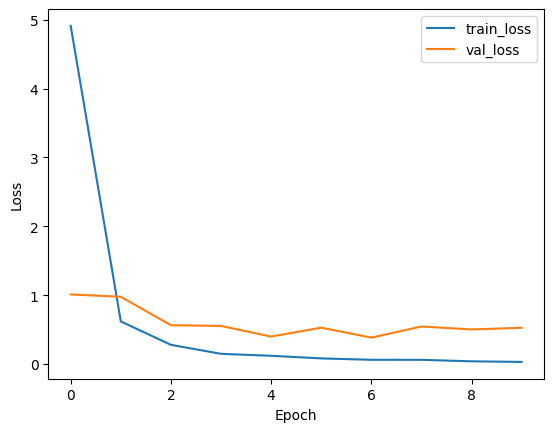

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.8962 - auc: 0.9442 - auc_1: 0.9050 - loss: 0.4919 - precision: 0.8529 - recall: 0.9203
Test Accuracy: 90.42%
Precision: 0.88
Recall: 0.93
AUC-ROC: 0.96
AUC-PR: 0.94
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 447ms/step
Confusion Matrix:
[[107  15]
 [  8 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       122
           1       0.88      0.93      0.91       118

    accuracy                           0.90       240
   macro avg       0.91      0.90      0.90       240
weighted avg       0.91      0.90      0.90       240



In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train XGBClassifier
# Flatten the image data to pass it to the XGBClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Avoid label encoder warning
xgb.fit(X_train_flat, y_train)

# Predict using the XGBClassifier
xgb_predictions = xgb.predict(X_test_flat)

# Evaluate the XGBClassifier
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
print("XGBClassifier Confusion Matrix:")
print(xgb_conf_matrix)

# Generate classification report for XGBClassifier
print("XGBClassifier Classification Report:")
print(classification_report(y_test, xgb_predictions))

# ROC curve for XGBClassifier
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_predictions)
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)
print(f'XGBClassifier AUC Score: {xgb_roc_auc:.2f}')

# Precision and Recall for XGBClassifier
xgb_precision = precision_score(y_test, xgb_predictions)
print(f'XGBClassifier Precision: {xgb_precision:.2f}')

xgb_recall = recall_score(y_test, xgb_predictions)
print(f'XGBClassifier Recall: {xgb_recall:.2f}')

# F1 Score for XGBClassifier
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f'XGBClassifier F1 Score: {xgb_f1:.2f}')

# Precision-Recall curve and PR AUC for XGBClassifier
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_predictions)
xgb_pr_auc = auc(xgb_recall, xgb_precision)
print(f'XGBClassifier PR AUC: {xgb_pr_auc:.2f}')

# Cohen's Kappa Coefficient for XGBClassifier
xgb_kappa = cohen_kappa_score(y_test, xgb_predictions)
print(f"XGBClassifier Cohen's Kappa: {xgb_kappa:.2f}")

# Matthews Correlation Coefficient for XGBClassifier
xgb_mcc = matthews_corrcoef(y_test, xgb_predictions)
print(f"XGBClassifier MCC: {xgb_mcc:.2f}")

# Balanced Accuracy for XGBClassifier
xgb_balanced_accuracy = balanced_accuracy_score(y_test, xgb_predictions)
print(f"XGBClassifier Balanced Accuracy: {xgb_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


2024-12-10 15:19:57.842502: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 15:19:57.847551: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:19:57.891940: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:19:57.950298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 15:19:57.993235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.5856 - auc: 0.6075 - auc_1: 0.6198 - loss: 9.2451 - precision: 0.6052 - recall: 0.5836 - val_accuracy: 0.8583 - val_auc: 0.8906 - val_auc_1: 0.8331 - val_loss: 1.1129 - val_precision: 0.8088 - val_recall: 0.9322
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.8608 - auc: 0.9067 - auc_1: 0.8647 - loss: 0.9384 - precision: 0.8399 - recall: 0.8817 - val_accuracy: 0.8708 - val_auc: 0.9439 - val_auc_1: 0.9189 - val_loss: 0.4591 - val_precision: 0.8085 - val_recall: 0.9661
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.9513 - auc: 0.9832 - auc_1: 0.9770 - loss: 0.1730 - precision: 0.9399 - recall: 0.9709 - val_accuracy: 0.8958 - val_auc: 0.9635 - val_auc_1: 0.9649 - val_loss: 0.2877 - val_precision: 0.8550 - val_recall: 0.9492
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.9713 - auc: 0.9961 - auc_1: 0.9956 - loss: 0.0735 - precision: 0.9705 - recall: 0.9724 - val

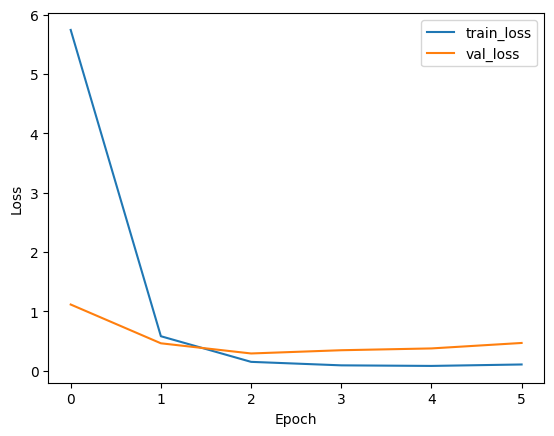

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.8695 - auc: 0.9427 - auc_1: 0.9381 - loss: 0.3690 - precision: 0.8089 - recall: 0.9138
Test Accuracy: 89.58%
Precision: 0.85
Recall: 0.95
AUC-ROC: 0.96
AUC-PR: 0.96
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 438ms/step
Confusion Matrix:
[[103  19]
 [  6 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       122
           1       0.85      0.95      0.90       118

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240



In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train XGBClassifier
# Flatten the image data to pass it to the XGBClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Avoid label encoder warning
xgb.fit(X_train_flat, y_train)

# Predict using the XGBClassifier
xgb_predictions = xgb.predict(X_test_flat)

# Evaluate the XGBClassifier
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
print("XGBClassifier Confusion Matrix:")
print(xgb_conf_matrix)

# Generate classification report for XGBClassifier
print("XGBClassifier Classification Report:")
print(classification_report(y_test, xgb_predictions))

# ROC curve for XGBClassifier
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_predictions)
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)
print(f'XGBClassifier AUC Score: {xgb_roc_auc:.2f}')

# Precision and Recall for XGBClassifier
xgb_precision = precision_score(y_test, xgb_predictions)
print(f'XGBClassifier Precision: {xgb_precision:.2f}')

xgb_recall = recall_score(y_test, xgb_predictions)
print(f'XGBClassifier Recall: {xgb_recall:.2f}')

# F1 Score for XGBClassifier
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f'XGBClassifier F1 Score: {xgb_f1:.2f}')

# Precision-Recall curve and PR AUC for XGBClassifier
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_predictions)
xgb_pr_auc = auc(xgb_recall, xgb_precision)
print(f'XGBClassifier PR AUC: {xgb_pr_auc:.2f}')

# Cohen's Kappa Coefficient for XGBClassifier
xgb_kappa = cohen_kappa_score(y_test, xgb_predictions)
print(f"XGBClassifier Cohen's Kappa: {xgb_kappa:.2f}")

# Matthews Correlation Coefficient for XGBClassifier
xgb_mcc = matthews_corrcoef(y_test, xgb_predictions)
print(f"XGBClassifier MCC: {xgb_mcc:.2f}")

# Balanced Accuracy for XGBClassifier
xgb_balanced_accuracy = balanced_accuracy_score(y_test, xgb_predictions)
print(f"XGBClassifier Balanced Accuracy: {xgb_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 409ms/step - accuracy: 0.5651 - auc: 0.5937 - auc_1: 0.5755 - loss: 8.1085 - precision: 0.5627 - recall: 0.5371 - val_accuracy: 0.8333 - val_auc: 0.9028 - val_auc_1: 0.8959 - val_loss: 0.8457 - val_precision: 0.8824 - val_recall: 0.7627
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - accuracy: 0.8839 - auc: 0.9370 - auc_1: 0.9235 - loss: 0.5505 - precision: 0.8735 - recall: 0.9038 - val_accuracy: 0.8708 - val_auc: 0.9568 - val_auc_1: 0.9596 - val_loss: 0.4246 - val_precision: 0.9394 - val_recall: 0.7881
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.9487 - auc: 0.9883 - auc_1: 0.9880 - loss: 0.1480 - precision: 0.9510 - recall: 0.9456 - val_accuracy: 0.9250 - val_auc: 0.9653 - val_auc_1: 0.9616 - val_loss: 0.2521 - val_precision: 0.9310 - val_recall: 0.9153
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.9768 - auc: 0.9968 - auc_1: 0.9973 - loss: 0.0789 - precision: 0.9707 - recall: 0.9844 - val

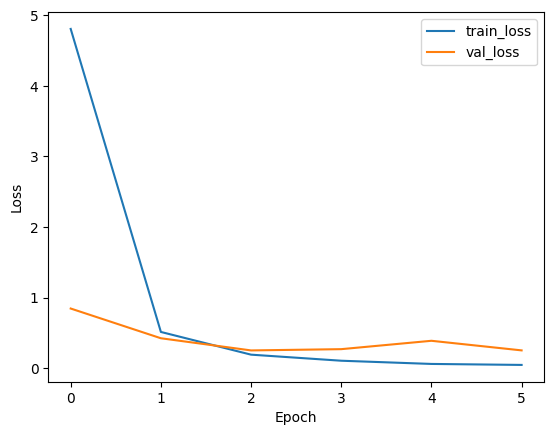

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9202 - auc: 0.9512 - auc_1: 0.9489 - loss: 0.2944 - precision: 0.9351 - recall: 0.8777
Test Accuracy: 92.50%
Precision: 0.93
Recall: 0.92
AUC-ROC: 0.97
AUC-PR: 0.96
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 400ms/step
Confusion Matrix:
[[114   8]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       122
           1       0.93      0.92      0.92       118

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.93      0.93      0.92       240



In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train XGBClassifier
# Flatten the image data to pass it to the XGBClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Avoid label encoder warning
xgb.fit(X_train_flat, y_train)

# Predict using the XGBClassifier
xgb_predictions = xgb.predict(X_test_flat)

# Evaluate the XGBClassifier
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
print("XGBClassifier Confusion Matrix:")
print(xgb_conf_matrix)

# Generate classification report for XGBClassifier
print("XGBClassifier Classification Report:")
print(classification_report(y_test, xgb_predictions))

# ROC curve for XGBClassifier
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_predictions)
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)
print(f'XGBClassifier AUC Score: {xgb_roc_auc:.2f}')

# Precision and Recall for XGBClassifier
xgb_precision = precision_score(y_test, xgb_predictions)
print(f'XGBClassifier Precision: {xgb_precision:.2f}')

xgb_recall = recall_score(y_test, xgb_predictions)
print(f'XGBClassifier Recall: {xgb_recall:.2f}')

# F1 Score for XGBClassifier
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f'XGBClassifier F1 Score: {xgb_f1:.2f}')

# Precision-Recall curve and PR AUC for XGBClassifier
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_predictions)
xgb_pr_auc = auc(xgb_recall, xgb_precision)
print(f'XGBClassifier PR AUC: {xgb_pr_auc:.2f}')

# Cohen's Kappa Coefficient for XGBClassifier
xgb_kappa = cohen_kappa_score(y_test, xgb_predictions)
print(f"XGBClassifier Cohen's Kappa: {xgb_kappa:.2f}")

# Matthews Correlation Coefficient for XGBClassifier
xgb_mcc = matthews_corrcoef(y_test, xgb_predictions)
print(f"XGBClassifier MCC: {xgb_mcc:.2f}")

# Balanced Accuracy for XGBClassifier
xgb_balanced_accuracy = balanced_accuracy_score(y_test, xgb_predictions)
print(f"XGBClassifier Balanced Accuracy: {xgb_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


LGBMClassifier

In [10]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.2 MB/s eta 0:00:0031m11.3 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 417ms/step - accuracy: 0.6656 - auc: 0.6916 - auc_1: 0.6877 - loss: 4.0045 - precision: 0.6833 - recall: 0.6950 - val_accuracy: 0.8500 - val_auc: 0.8885 - val_auc_1: 0.8318 - val_loss: 1.2616 - val_precision: 0.8106 - val_recall: 0.9068
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 360ms/step - accuracy: 0.8840 - auc: 0.9071 - auc_1: 0.8761 - loss: 1.1647 - precision: 0.8677 - recall: 0.9105 - val_accuracy: 0.8583 - val_auc: 0.9036 - val_auc_1: 0.8448 - val_loss: 1.4520 - val_precision: 0.7917 - val_recall: 0.9661
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.9148 - auc: 0.9454 - auc_1: 0.9278 - loss: 0.5893 - precision: 0.8997 - recall: 0.9396 - val_accuracy: 0.8833 - val_auc: 0.9370 - val_auc_1: 0.9064 - val_loss: 0.8030 - val_precision: 0.8409 - val_recall: 0.9407
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.9591 - auc: 0.9838 - auc_1: 0.9788 - loss: 0.1753 - precision: 0.9507 - recall: 0.9688 - val_acc

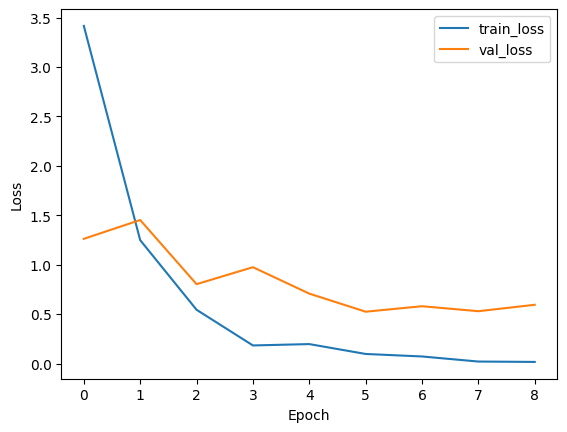

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.8952 - auc: 0.9248 - auc_1: 0.8832 - loss: 0.6651 - precision: 0.8833 - recall: 0.8743
Test Accuracy: 90.83%
Precision: 0.91
Recall: 0.90
AUC-ROC: 0.94
AUC-PR: 0.92
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step
Confusion Matrix:
[[112  10]
 [ 12 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       122
           1       0.91      0.90      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240

[LightGBM] [Info] Number of positive: 482, number of negative: 478
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 7.265442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24287751


In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train LGBMClassifier
# Flatten the image data to pass it to the LGBMClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_flat, y_train)

# Predict using the LGBMClassifier
lgbm_predictions = lgbm.predict(X_test_flat)

# Evaluate the LGBMClassifier
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_predictions)
print("LGBMClassifier Confusion Matrix:")
print(lgbm_conf_matrix)

# Generate classification report for LGBMClassifier
print("LGBMClassifier Classification Report:")
print(classification_report(y_test, lgbm_predictions))

# ROC curve for LGBMClassifier
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_predictions)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_predictions)
print(f'LGBMClassifier AUC Score: {lgbm_roc_auc:.2f}')

# Precision and Recall for LGBMClassifier
lgbm_precision = precision_score(y_test, lgbm_predictions)
print(f'LGBMClassifier Precision: {lgbm_precision:.2f}')

lgbm_recall = recall_score(y_test, lgbm_predictions)
print(f'LGBMClassifier Recall: {lgbm_recall:.2f}')

# F1 Score for LGBMClassifier
lgbm_f1 = f1_score(y_test, lgbm_predictions)
print(f'LGBMClassifier F1 Score: {lgbm_f1:.2f}')

# Precision-Recall curve and PR AUC for LGBMClassifier
lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, lgbm_predictions)
lgbm_pr_auc = auc(lgbm_recall, lgbm_precision)
print(f'LGBMClassifier PR AUC: {lgbm_pr_auc:.2f}')

# Cohen's Kappa Coefficient for LGBMClassifier
lgbm_kappa = cohen_kappa_score(y_test, lgbm_predictions)
print(f"LGBMClassifier Cohen's Kappa: {lgbm_kappa:.2f}")

# Matthews Correlation Coefficient for LGBMClassifier
lgbm_mcc = matthews_corrcoef(y_test, lgbm_predictions)
print(f"LGBMClassifier MCC: {lgbm_mcc:.2f}")

# Balanced Accuracy for LGBMClassifier
lgbm_balanced_accuracy = balanced_accuracy_score(y_test, lgbm_predictions)
print(f"LGBMClassifier Balanced Accuracy: {lgbm_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


2024-12-10 15:30:08.485334: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 15:30:08.491120: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:30:08.537525: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:30:08.594428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 15:30:08.636338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 422ms/step - accuracy: 0.6398 - auc: 0.6739 - auc_1: 0.6434 - loss: 4.5646 - precision: 0.6335 - recall: 0.6644 - val_accuracy: 0.8375 - val_auc: 0.9089 - val_auc_1: 0.9069 - val_loss: 1.2300 - val_precision: 0.9247 - val_recall: 0.7288
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.8900 - auc: 0.9346 - auc_1: 0.9322 - loss: 0.7935 - precision: 0.9070 - recall: 0.8806 - val_accuracy: 0.8667 - val_auc: 0.9163 - val_auc_1: 0.8721 - val_loss: 0.8661 - val_precision: 0.8071 - val_recall: 0.9576
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 366ms/step - accuracy: 0.9479 - auc: 0.9850 - auc_1: 0.9841 - loss: 0.2083 - precision: 0.9441 - recall: 0.9519 - val_accuracy: 0.8917 - val_auc: 0.9300 - val_auc_1: 0.8921 - val_loss: 0.5728 - val_precision: 0.8485 - val_recall: 0.9492
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - accuracy: 0.9514 - auc: 0.9822 - auc_1: 0.9781 - loss: 0.2249 - precision: 0.9510 - recall: 0.9519 - val

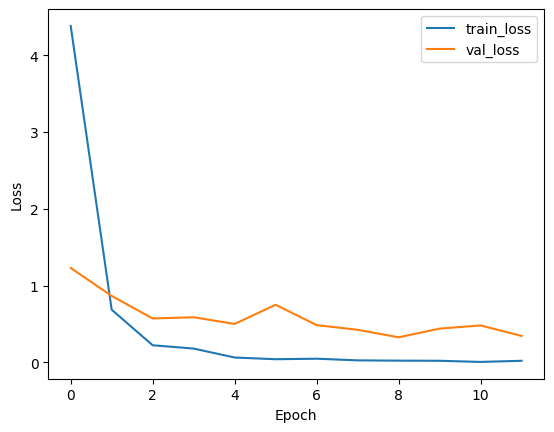

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.9065 - auc: 0.9416 - auc_1: 0.9114 - loss: 0.4281 - precision: 0.8799 - recall: 0.9096
Test Accuracy: 92.08%
Precision: 0.92
Recall: 0.92
AUC-ROC: 0.96
AUC-PR: 0.94
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step
Confusion Matrix:
[[112  10]
 [  9 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       122
           1       0.92      0.92      0.92       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240

[LightGBM] [Info] Number of positive: 482, number of negative: 478
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 7.118224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24287751


In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train LGBMClassifier
# Flatten the image data to pass it to the LGBMClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_flat, y_train)

# Predict using the LGBMClassifier
lgbm_predictions = lgbm.predict(X_test_flat)

# Evaluate the LGBMClassifier
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_predictions)
print("LGBMClassifier Confusion Matrix:")
print(lgbm_conf_matrix)

# Generate classification report for LGBMClassifier
print("LGBMClassifier Classification Report:")
print(classification_report(y_test, lgbm_predictions))

# ROC curve for LGBMClassifier
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_predictions)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_predictions)
print(f'LGBMClassifier AUC Score: {lgbm_roc_auc:.2f}')

# Precision and Recall for LGBMClassifier
lgbm_precision = precision_score(y_test, lgbm_predictions)
print(f'LGBMClassifier Precision: {lgbm_precision:.2f}')

lgbm_recall = recall_score(y_test, lgbm_predictions)
print(f'LGBMClassifier Recall: {lgbm_recall:.2f}')

# F1 Score for LGBMClassifier
lgbm_f1 = f1_score(y_test, lgbm_predictions)
print(f'LGBMClassifier F1 Score: {lgbm_f1:.2f}')

# Precision-Recall curve and PR AUC for LGBMClassifier
lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, lgbm_predictions)
lgbm_pr_auc = auc(lgbm_recall, lgbm_precision)
print(f'LGBMClassifier PR AUC: {lgbm_pr_auc:.2f}')

# Cohen's Kappa Coefficient for LGBMClassifier
lgbm_kappa = cohen_kappa_score(y_test, lgbm_predictions)
print(f"LGBMClassifier Cohen's Kappa: {lgbm_kappa:.2f}")

# Matthews Correlation Coefficient for LGBMClassifier
lgbm_mcc = matthews_corrcoef(y_test, lgbm_predictions)
print(f"LGBMClassifier MCC: {lgbm_mcc:.2f}")

# Balanced Accuracy for LGBMClassifier
lgbm_balanced_accuracy = balanced_accuracy_score(y_test, lgbm_predictions)
print(f"LGBMClassifier Balanced Accuracy: {lgbm_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


2024-12-10 15:34:18.216739: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 15:34:18.221613: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:34:18.262265: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 15:34:18.317117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 15:34:18.356911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 416ms/step - accuracy: 0.5682 - auc: 0.5924 - auc_1: 0.5742 - loss: 10.1113 - precision: 0.5625 - recall: 0.5857 - val_accuracy: 0.8167 - val_auc: 0.9076 - val_auc_1: 0.8654 - val_loss: 0.7721 - val_precision: 0.7534 - val_recall: 0.9322
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.8800 - auc: 0.9371 - auc_1: 0.9227 - loss: 0.4537 - precision: 0.8607 - recall: 0.9192 - val_accuracy: 0.8958 - val_auc: 0.9512 - val_auc_1: 0.9522 - val_loss: 0.2854 - val_precision: 0.9043 - val_recall: 0.8814
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - accuracy: 0.9517 - auc: 0.9908 - auc_1: 0.9915 - loss: 0.1372 - precision: 0.9544 - recall: 0.9520 - val_accuracy: 0.8958 - val_auc: 0.9593 - val_auc_1: 0.9600 - val_loss: 0.2767 - val_precision: 0.9266 - val_recall: 0.8559
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 361ms/step - accuracy: 0.9684 - auc: 0.9948 - auc_1: 0.9952 - loss: 0.0928 - precision: 0.9601 - recall: 0.9787 - va

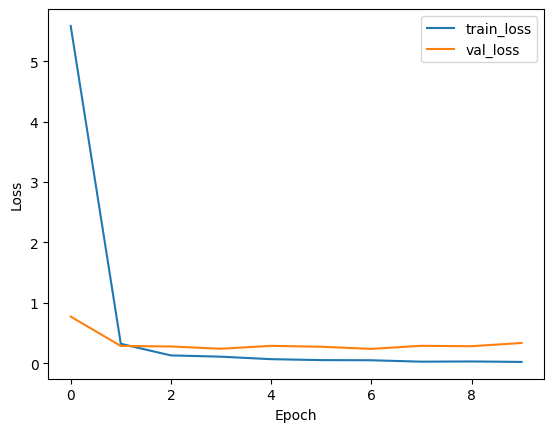

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9233 - auc: 0.9586 - auc_1: 0.9556 - loss: 0.2996 - precision: 0.9104 - recall: 0.9138
Test Accuracy: 92.92%
Precision: 0.93
Recall: 0.92
AUC-ROC: 0.97
AUC-PR: 0.97
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step
Confusion Matrix:
[[114   8]
 [  9 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       122
           1       0.93      0.92      0.93       118

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train LGBMClassifier
# Flatten the image data to pass it to the LGBMClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_flat, y_train)

# Predict using the LGBMClassifier
lgbm_predictions = lgbm.predict(X_test_flat)

# Evaluate the LGBMClassifier
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_predictions)
print("LGBMClassifier Confusion Matrix:")
print(lgbm_conf_matrix)

# Generate classification report for LGBMClassifier
print("LGBMClassifier Classification Report:")
print(classification_report(y_test, lgbm_predictions))

# ROC curve for LGBMClassifier
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_predictions)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_predictions)
print(f'LGBMClassifier AUC Score: {lgbm_roc_auc:.2f}')

# Precision and Recall for LGBMClassifier
lgbm_precision = precision_score(y_test, lgbm_predictions)
print(f'LGBMClassifier Precision: {lgbm_precision:.2f}')

lgbm_recall = recall_score(y_test, lgbm_predictions)
print(f'LGBMClassifier Recall: {lgbm_recall:.2f}')

# F1 Score for LGBMClassifier
lgbm_f1 = f1_score(y_test, lgbm_predictions)
print(f'LGBMClassifier F1 Score: {lgbm_f1:.2f}')

# Precision-Recall curve and PR AUC for LGBMClassifier
lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, lgbm_predictions)
lgbm_pr_auc = auc(lgbm_recall, lgbm_precision)
print(f'LGBMClassifier PR AUC: {lgbm_pr_auc:.2f}')

# Cohen's Kappa Coefficient for LGBMClassifier
lgbm_kappa = cohen_kappa_score(y_test, lgbm_predictions)
print(f"LGBMClassifier Cohen's Kappa: {lgbm_kappa:.2f}")

# Matthews Correlation Coefficient for LGBMClassifier
lgbm_mcc = matthews_corrcoef(y_test, lgbm_predictions)
print(f"LGBMClassifier MCC: {lgbm_mcc:.2f}")

# Balanced Accuracy for LGBMClassifier
lgbm_balanced_accuracy = balanced_accuracy_score(y_test, lgbm_predictions)
print(f"LGBMClassifier Balanced Accuracy: {lgbm_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


AdaBoostClassifier

2024-12-10 16:07:46.316613: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 16:07:46.317146: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 16:07:46.318966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 16:07:46.323370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 16:07:46.330248: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.6384 - auc: 0.6740 - auc_1: 0.6212 - loss: 5.6975 - precision: 0.6208 - recall: 0.6022 - val_accuracy: 0.8833 - val_auc: 0.9411 - val_auc_1: 0.9350 - val_loss: 0.6396 - val_precision: 0.8750 - val_recall: 0.8898
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.8971 - auc: 0.9361 - auc_1: 0.9304 - loss: 0.6527 - precision: 0.9000 - recall: 0.9050 - val_accuracy: 0.8875 - val_auc: 0.9401 - val_auc_1: 0.9230 - val_loss: 0.4532 - val_precision: 0.9333 - val_recall: 0.8305
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.9419 - auc: 0.9789 - auc_1: 0.9702 - loss: 0.2168 - precision: 0.9350 - recall: 0.9482 - val_accuracy: 0.8750 - val_auc: 0.9520 - val_auc_1: 0.9518 - val_loss: 0.3505 - val_precision: 0.8607 - val_recall: 0.8898
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.9707 - auc: 0.9942 - auc_1: 0.9957 - loss: 0.0856 - precision: 0.9778 - recall: 0.9641 - val_acc

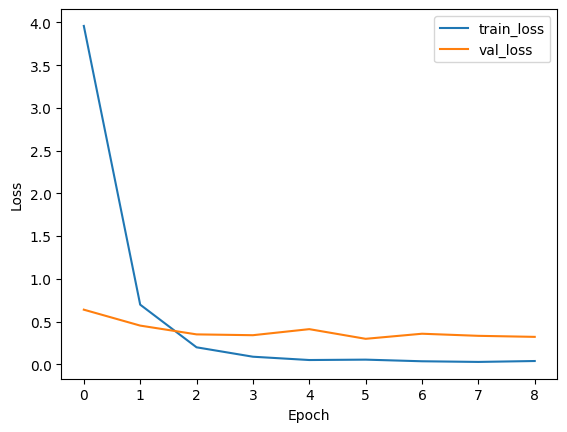

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9323 - auc: 0.9724 - auc_1: 0.9514 - loss: 0.2570 - precision: 0.9163 - recall: 0.9342
Test Accuracy: 91.67%
Precision: 0.94
Recall: 0.89
AUC-ROC: 0.97
AUC-PR: 0.96
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step
Confusion Matrix:
[[115   7]
 [ 13 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       122
           1       0.94      0.89      0.91       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240



KeyboardInterrupt: 

In [9]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train AdaBoostClassifier
# Flatten the image data to pass it to the AdaBoostClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_flat, y_train)

# Predict using the AdaBoostClassifier
adaboost_predictions = adaboost.predict(X_test_flat)

# Evaluate the AdaBoostClassifier
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)
print("AdaBoostClassifier Confusion Matrix:")
print(adaboost_conf_matrix)

# Generate classification report for AdaBoostClassifier
print("AdaBoostClassifier Classification Report:")
print(classification_report(y_test, adaboost_predictions))

# ROC curve for AdaBoostClassifier
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_predictions)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier AUC Score: {adaboost_roc_auc:.2f}')

# Precision and Recall for AdaBoostClassifier
adaboost_precision = precision_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier Precision: {adaboost_precision:.2f}')

adaboost_recall = recall_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier Recall: {adaboost_recall:.2f}')

# F1 Score for AdaBoostClassifier
adaboost_f1 = f1_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier F1 Score: {adaboost_f1:.2f}')

# Precision-Recall curve and PR AUC for AdaBoostClassifier
adaboost_precision, adaboost_recall, _ = precision_recall_curve(y_test, adaboost_predictions)
adaboost_pr_auc = auc(adaboost_recall, adaboost_precision)
print(f'AdaBoostClassifier PR AUC: {adaboost_pr_auc:.2f}')

# Cohen's Kappa Coefficient for AdaBoostClassifier
adaboost_kappa = cohen_kappa_score(y_test, adaboost_predictions)
print(f"AdaBoostClassifier Cohen's Kappa: {adaboost_kappa:.2f}")

# Matthews Correlation Coefficient for AdaBoostClassifier
adaboost_mcc = matthews_corrcoef(y_test, adaboost_predictions)
print(f"AdaBoostClassifier MCC: {adaboost_mcc:.2f}")

# Balanced Accuracy for AdaBoostClassifier
adaboost_balanced_accuracy = balanced_accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoostClassifier Balanced Accuracy: {adaboost_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 407ms/step - accuracy: 0.6047 - auc_2: 0.6354 - auc_3: 0.6132 - loss: 5.8886 - precision_1: 0.6028 - recall_1: 0.5951 - val_accuracy: 0.8625 - val_auc_2: 0.9075 - val_auc_3: 0.9067 - val_loss: 0.9042 - val_precision_1: 0.8972 - val_recall_1: 0.8136
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.8985 - auc_2: 0.9330 - auc_3: 0.9202 - loss: 0.7472 - precision_1: 0.9133 - recall_1: 0.8832 - val_accuracy: 0.9000 - val_auc_2: 0.9575 - val_auc_3: 0.9515 - val_loss: 0.4055 - val_precision_1: 0.9123 - val_recall_1: 0.8814
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.9534 - auc_2: 0.9844 - auc_3: 0.9806 - loss: 0.1578 - precision_1: 0.9528 - recall_1: 0.9515 - val_accuracy: 0.9042 - val_auc_2: 0.9690 - val_auc_3: 0.9545 - val_loss: 0.3142 - val_precision_1: 0.8740 - val_recall_1: 0.9407
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 345ms/step - accuracy: 0.9756 - auc_2: 0.9981 - auc_3: 0.9980 - loss: 0.0657 - pr

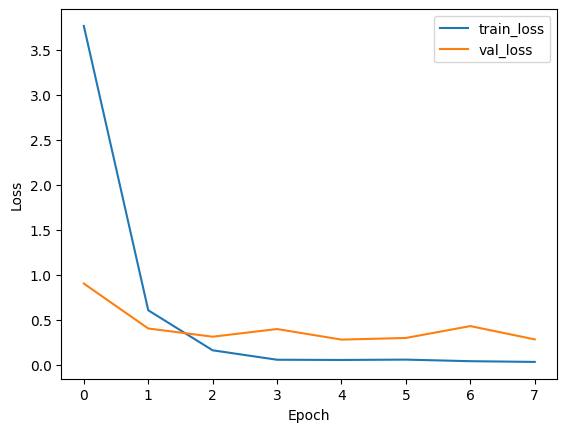

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.9123 - auc_2: 0.9734 - auc_3: 0.9498 - loss: 0.2926 - precision_1: 0.8960 - recall_1: 0.9061
Test Accuracy: 91.67%
Precision: 0.93
Recall: 0.90
AUC-ROC: 0.97
AUC-PR: 0.96
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 477ms/step
Confusion Matrix:
[[114   8]
 [ 12 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       122
           1       0.93      0.90      0.91       118

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240



KeyboardInterrupt: 

In [10]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train AdaBoostClassifier
# Flatten the image data to pass it to the AdaBoostClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_flat, y_train)

# Predict using the AdaBoostClassifier
adaboost_predictions = adaboost.predict(X_test_flat)

# Evaluate the AdaBoostClassifier
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)
print("AdaBoostClassifier Confusion Matrix:")
print(adaboost_conf_matrix)

# Generate classification report for AdaBoostClassifier
print("AdaBoostClassifier Classification Report:")
print(classification_report(y_test, adaboost_predictions))

# ROC curve for AdaBoostClassifier
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_predictions)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier AUC Score: {adaboost_roc_auc:.2f}')

# Precision and Recall for AdaBoostClassifier
adaboost_precision = precision_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier Precision: {adaboost_precision:.2f}')

adaboost_recall = recall_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier Recall: {adaboost_recall:.2f}')

# F1 Score for AdaBoostClassifier
adaboost_f1 = f1_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier F1 Score: {adaboost_f1:.2f}')

# Precision-Recall curve and PR AUC for AdaBoostClassifier
adaboost_precision, adaboost_recall, _ = precision_recall_curve(y_test, adaboost_predictions)
adaboost_pr_auc = auc(adaboost_recall, adaboost_precision)
print(f'AdaBoostClassifier PR AUC: {adaboost_pr_auc:.2f}')

# Cohen's Kappa Coefficient for AdaBoostClassifier
adaboost_kappa = cohen_kappa_score(y_test, adaboost_predictions)
print(f"AdaBoostClassifier Cohen's Kappa: {adaboost_kappa:.2f}")

# Matthews Correlation Coefficient for AdaBoostClassifier
adaboost_mcc = matthews_corrcoef(y_test, adaboost_predictions)
print(f"AdaBoostClassifier MCC: {adaboost_mcc:.2f}")

# Balanced Accuracy for AdaBoostClassifier
adaboost_balanced_accuracy = balanced_accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoostClassifier Balanced Accuracy: {adaboost_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.5746 - auc_4: 0.5731 - auc_5: 0.5590 - loss: 10.1315 - precision_2: 0.5756 - recall_2: 0.5649 - val_accuracy: 0.8208 - val_auc_4: 0.8616 - val_auc_5: 0.8928 - val_loss: 1.3422 - val_precision_2: 0.9412 - val_recall_2: 0.6780
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.8817 - auc_4: 0.9270 - auc_5: 0.9011 - loss: 0.7352 - precision_2: 0.8726 - recall_2: 0.8842 - val_accuracy: 0.8542 - val_auc_4: 0.9254 - val_auc_5: 0.8946 - val_loss: 0.5608 - val_precision_2: 0.8029 - val_recall_2: 0.9322
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.9394 - auc_4: 0.9763 - auc_5: 0.9627 - loss: 0.2379 - precision_2: 0.9343 - recall_2: 0.9453 - val_accuracy: 0.9083 - val_auc_4: 0.9739 - val_auc_5: 0.9742 - val_loss: 0.2237 - val_precision_2: 0.9000 - val_recall_2: 0.9153
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - accuracy: 0.9673 - auc_4: 0.9939 - auc_5: 0.9950 - loss: 0.0952 - p

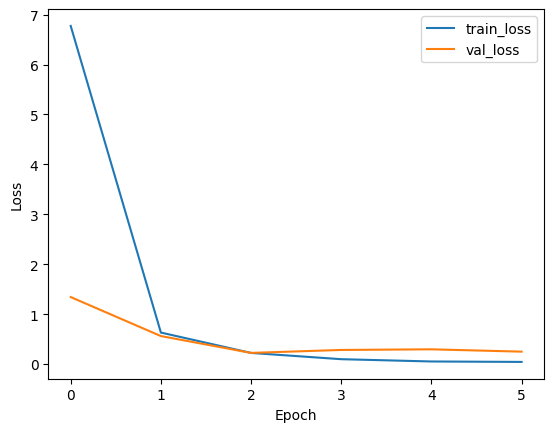

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9108 - auc_4: 0.9767 - auc_5: 0.9716 - loss: 0.2300 - precision_2: 0.8706 - recall_2: 0.9381
Test Accuracy: 90.83%
Precision: 0.90
Recall: 0.92
AUC-ROC: 0.97
AUC-PR: 0.97
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step
Confusion Matrix:
[[110  12]
 [ 10 108]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       122
           1       0.90      0.92      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



KeyboardInterrupt: 

In [11]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train AdaBoostClassifier
# Flatten the image data to pass it to the AdaBoostClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_flat, y_train)

# Predict using the AdaBoostClassifier
adaboost_predictions = adaboost.predict(X_test_flat)

# Evaluate the AdaBoostClassifier
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)
print("AdaBoostClassifier Confusion Matrix:")
print(adaboost_conf_matrix)

# Generate classification report for AdaBoostClassifier
print("AdaBoostClassifier Classification Report:")
print(classification_report(y_test, adaboost_predictions))

# ROC curve for AdaBoostClassifier
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_predictions)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier AUC Score: {adaboost_roc_auc:.2f}')

# Precision and Recall for AdaBoostClassifier
adaboost_precision = precision_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier Precision: {adaboost_precision:.2f}')

adaboost_recall = recall_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier Recall: {adaboost_recall:.2f}')

# F1 Score for AdaBoostClassifier
adaboost_f1 = f1_score(y_test, adaboost_predictions)
print(f'AdaBoostClassifier F1 Score: {adaboost_f1:.2f}')

# Precision-Recall curve and PR AUC for AdaBoostClassifier
adaboost_precision, adaboost_recall, _ = precision_recall_curve(y_test, adaboost_predictions)
adaboost_pr_auc = auc(adaboost_recall, adaboost_precision)
print(f'AdaBoostClassifier PR AUC: {adaboost_pr_auc:.2f}')

# Cohen's Kappa Coefficient for AdaBoostClassifier
adaboost_kappa = cohen_kappa_score(y_test, adaboost_predictions)
print(f"AdaBoostClassifier Cohen's Kappa: {adaboost_kappa:.2f}")

# Matthews Correlation Coefficient for AdaBoostClassifier
adaboost_mcc = matthews_corrcoef(y_test, adaboost_predictions)
print(f"AdaBoostClassifier MCC: {adaboost_mcc:.2f}")

# Balanced Accuracy for AdaBoostClassifier
adaboost_balanced_accuracy = balanced_accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoostClassifier Balanced Accuracy: {adaboost_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


CatBoostClassifier

In [13]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:000m eta 0:00:0136m0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 11.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 418ms/step - accuracy: 0.6746 - auc_6: 0.6984 - auc_7: 0.6650 - loss: 4.7279 - precision_3: 0.6711 - recall_3: 0.6647 - val_accuracy: 0.8583 - val_auc_6: 0.8979 - val_auc_7: 0.8667 - val_loss: 1.1812 - val_precision_3: 0.8559 - val_recall_3: 0.8559
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - accuracy: 0.9187 - auc_6: 0.9498 - auc_7: 0.9365 - loss: 0.6916 - precision_3: 0.9226 - recall_3: 0.9204 - val_accuracy: 0.8833 - val_auc_6: 0.9271 - val_auc_7: 0.9361 - val_loss: 0.7485 - val_precision_3: 0.9500 - val_recall_3: 0.8051
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - accuracy: 0.9134 - auc_6: 0.9525 - auc_7: 0.9370 - loss: 0.5458 - precision_3: 0.9284 - recall_3: 0.8914 - val_accuracy: 0.8750 - val_auc_6: 0.9440 - val_auc_7: 0.9326 - val_loss: 0.5894 - val_precision_3: 0.8860 - val_recall_3: 0.8559
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.9612 - auc_6: 0.9884 - auc_7: 0.9862 - loss: 0.1614 - precis

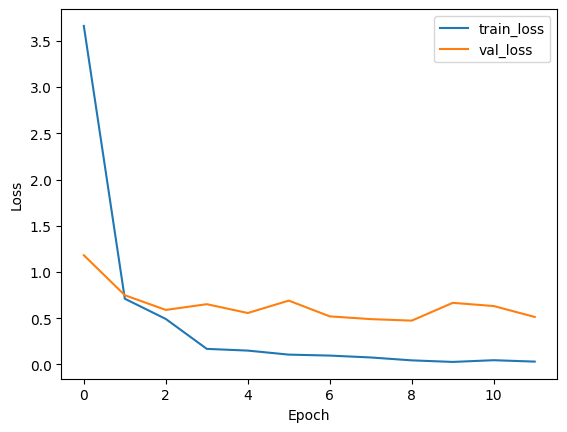

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9006 - auc_6: 0.9424 - auc_7: 0.8788 - loss: 0.6016 - precision_3: 0.8515 - recall_3: 0.9384
Test Accuracy: 91.25%
Precision: 0.89
Recall: 0.93
AUC-ROC: 0.95
AUC-PR: 0.91
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step
Confusion Matrix:
[[109  13]
 [  8 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       122
           1       0.89      0.93      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



KeyboardInterrupt: 

In [14]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train CatBoostClassifier
# Flatten the image data to pass it to the CatBoostClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the CatBoostClassifier
catboost = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, cat_features=[])
catboost.fit(X_train_flat, y_train, verbose=100)

# Predict using the CatBoostClassifier
catboost_predictions = catboost.predict(X_test_flat)

# Evaluate the CatBoostClassifier
catboost_conf_matrix = confusion_matrix(y_test, catboost_predictions)
print("CatBoostClassifier Confusion Matrix:")
print(catboost_conf_matrix)

# Generate classification report for CatBoostClassifier
print("CatBoostClassifier Classification Report:")
print(classification_report(y_test, catboost_predictions))

# ROC curve for CatBoostClassifier
catboost_fpr, catboost_tpr, _ = roc_curve(y_test, catboost_predictions)
catboost_roc_auc = roc_auc_score(y_test, catboost_predictions)
print(f'CatBoostClassifier AUC Score: {catboost_roc_auc:.2f}')

# Precision and Recall for CatBoostClassifier
catboost_precision = precision_score(y_test, catboost_predictions)
print(f'CatBoostClassifier Precision: {catboost_precision:.2f}')

catboost_recall = recall_score(y_test, catboost_predictions)
print(f'CatBoostClassifier Recall: {catboost_recall:.2f}')

# F1 Score for CatBoostClassifier
catboost_f1 = f1_score(y_test, catboost_predictions)
print(f'CatBoostClassifier F1 Score: {catboost_f1:.2f}')

# Precision-Recall curve and PR AUC for CatBoostClassifier
catboost_precision, catboost_recall, _ = precision_recall_curve(y_test, catboost_predictions)
catboost_pr_auc = auc(catboost_recall, catboost_precision)
print(f'CatBoostClassifier PR AUC: {catboost_pr_auc:.2f}')

# Cohen's Kappa Coefficient for CatBoostClassifier
catboost_kappa = cohen_kappa_score(y_test, catboost_predictions)
print(f"CatBoostClassifier Cohen's Kappa: {catboost_kappa:.2f}")

# Matthews Correlation Coefficient for CatBoostClassifier
catboost_mcc = matthews_corrcoef(y_test, catboost_predictions)
print(f"CatBoostClassifier MCC: {catboost_mcc:.2f}")

# Balanced Accuracy for CatBoostClassifier
catboost_balanced_accuracy = balanced_accuracy_score(y_test, catboost_predictions)
print(f"CatBoostClassifier Balanced Accuracy: {catboost_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 414ms/step - accuracy: 0.6336 - auc_8: 0.6407 - auc_9: 0.6050 - loss: 6.3269 - precision_4: 0.6209 - recall_4: 0.6175 - val_accuracy: 0.8500 - val_auc_8: 0.8817 - val_auc_9: 0.8350 - val_loss: 1.1615 - val_precision_4: 0.8254 - val_recall_4: 0.8814
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.8628 - auc_8: 0.9060 - auc_9: 0.8789 - loss: 1.1917 - precision_4: 0.8789 - recall_4: 0.8264 - val_accuracy: 0.7875 - val_auc_8: 0.8889 - val_auc_9: 0.8180 - val_loss: 1.3736 - val_precision_4: 0.6982 - val_recall_4: 1.0000
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 351ms/step - accuracy: 0.9150 - auc_8: 0.9605 - auc_9: 0.9571 - loss: 0.3912 - precision_4: 0.9058 - recall_4: 0.9325 - val_accuracy: 0.9042 - val_auc_8: 0.9675 - val_auc_9: 0.9575 - val_loss: 0.3276 - val_precision_4: 0.8926 - val_recall_4: 0.9153
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 351ms/step - accuracy: 0.9647 - auc_8: 0.9941 - auc_9: 0.9930 - loss: 0.0988 - pr

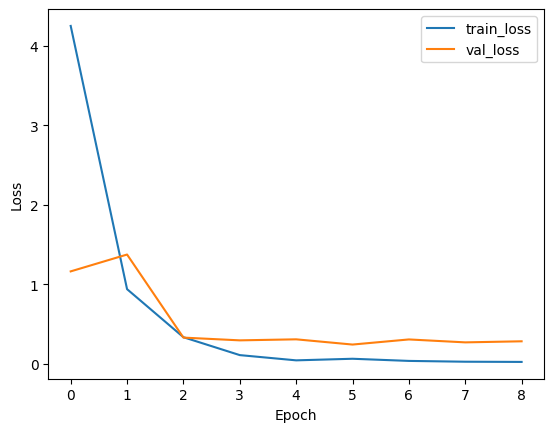

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.9052 - auc_8: 0.9734 - auc_9: 0.9541 - loss: 0.2672 - precision_4: 0.8615 - recall_4: 0.9349
Test Accuracy: 90.83%
Precision: 0.89
Recall: 0.92
AUC-ROC: 0.97
AUC-PR: 0.97
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 518ms/step
Confusion Matrix:
[[109  13]
 [  9 109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       122
           1       0.89      0.92      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



KeyboardInterrupt: 

In [15]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train CatBoostClassifier
# Flatten the image data to pass it to the CatBoostClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the CatBoostClassifier
catboost = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, cat_features=[])
catboost.fit(X_train_flat, y_train, verbose=100)

# Predict using the CatBoostClassifier
catboost_predictions = catboost.predict(X_test_flat)

# Evaluate the CatBoostClassifier
catboost_conf_matrix = confusion_matrix(y_test, catboost_predictions)
print("CatBoostClassifier Confusion Matrix:")
print(catboost_conf_matrix)

# Generate classification report for CatBoostClassifier
print("CatBoostClassifier Classification Report:")
print(classification_report(y_test, catboost_predictions))

# ROC curve for CatBoostClassifier
catboost_fpr, catboost_tpr, _ = roc_curve(y_test, catboost_predictions)
catboost_roc_auc = roc_auc_score(y_test, catboost_predictions)
print(f'CatBoostClassifier AUC Score: {catboost_roc_auc:.2f}')

# Precision and Recall for CatBoostClassifier
catboost_precision = precision_score(y_test, catboost_predictions)
print(f'CatBoostClassifier Precision: {catboost_precision:.2f}')

catboost_recall = recall_score(y_test, catboost_predictions)
print(f'CatBoostClassifier Recall: {catboost_recall:.2f}')

# F1 Score for CatBoostClassifier
catboost_f1 = f1_score(y_test, catboost_predictions)
print(f'CatBoostClassifier F1 Score: {catboost_f1:.2f}')

# Precision-Recall curve and PR AUC for CatBoostClassifier
catboost_precision, catboost_recall, _ = precision_recall_curve(y_test, catboost_predictions)
catboost_pr_auc = auc(catboost_recall, catboost_precision)
print(f'CatBoostClassifier PR AUC: {catboost_pr_auc:.2f}')

# Cohen's Kappa Coefficient for CatBoostClassifier
catboost_kappa = cohen_kappa_score(y_test, catboost_predictions)
print(f"CatBoostClassifier Cohen's Kappa: {catboost_kappa:.2f}")

# Matthews Correlation Coefficient for CatBoostClassifier
catboost_mcc = matthews_corrcoef(y_test, catboost_predictions)
print(f"CatBoostClassifier MCC: {catboost_mcc:.2f}")

# Balanced Accuracy for CatBoostClassifier
catboost_balanced_accuracy = balanced_accuracy_score(y_test, catboost_predictions)
print(f"CatBoostClassifier Balanced Accuracy: {catboost_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


2024-12-10 16:24:29.558832: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 16:24:29.563399: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 16:24:29.607356: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 16:24:29.663903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 16:24:29.704784: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)      │ (None, 7, 7, 1056)     │     4,269,716 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51744)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,493,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,763,669 (117.35 MB)

 Trainable params: 26,493,953 (101.07 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.6211 - auc: 0.6502 - auc_1: 0.6338 - loss: 6.2802 - precision: 0.6227 - recall: 0.6443 - val_accuracy: 0.8083 - val_auc: 0.8896 - val_auc_1: 0.9217 - val_loss: 1.2903 - val_precision: 0.9865 - val_recall: 0.6186
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.8839 - auc: 0.9412 - auc_1: 0.9350 - loss: 0.6421 - precision: 0.9166 - recall: 0.8383 - val_accuracy: 0.9083 - val_auc: 0.9595 - val_auc_1: 0.9534 - val_loss: 0.3320 - val_precision: 0.9211 - val_recall: 0.8898
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.9372 - auc: 0.9837 - auc_1: 0.9793 - loss: 0.1894 - precision: 0.9531 - recall: 0.9218 - val_accuracy: 0.9042 - val_auc: 0.9622 - val_auc_1: 0.9642 - val_loss: 0.3208 - val_precision: 0.9279 - val_recall: 0.8729
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - accuracy: 0.9471 - auc: 0.9946 - auc_1: 0.9945 - loss: 0.1175 - precision: 0.9632 - recall: 0.9275 - val

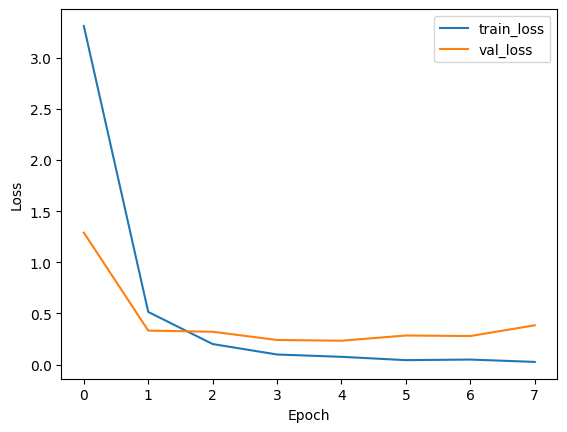

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9199 - auc: 0.9743 - auc_1: 0.9538 - loss: 0.2439 - precision: 0.8759 - recall: 0.9546
Test Accuracy: 91.25%
Precision: 0.89
Recall: 0.93
AUC-ROC: 0.97
AUC-PR: 0.97
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step
Confusion Matrix:
[[109  13]
 [  8 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       122
           1       0.89      0.93      0.91       118

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.91      0.91      0.91       240



In [ ]:
import numpy as np
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the NASNetMobile model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load the pre-trained NASNetMobile model without the top layers
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base NASNetMobile model
for layer in nasnet_base.layers:
    layer.trainable = False

# Create a new model on top of the NASNetMobile base
model = Sequential([
    nasnet_base,
    Flatten(),
    Dense(512, activation='relu'),  # You can adjust the units as needed
    Dropout(0.5),  # Add dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# Train CatBoostClassifier
# Flatten the image data to pass it to the CatBoostClassifier
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Initialize and train the CatBoostClassifier
catboost = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, cat_features=[])
catboost.fit(X_train_flat, y_train, verbose=100)

# Predict using the CatBoostClassifier
catboost_predictions = catboost.predict(X_test_flat)

# Evaluate the CatBoostClassifier
catboost_conf_matrix = confusion_matrix(y_test, catboost_predictions)
print("CatBoostClassifier Confusion Matrix:")
print(catboost_conf_matrix)

# Generate classification report for CatBoostClassifier
print("CatBoostClassifier Classification Report:")
print(classification_report(y_test, catboost_predictions))

# ROC curve for CatBoostClassifier
catboost_fpr, catboost_tpr, _ = roc_curve(y_test, catboost_predictions)
catboost_roc_auc = roc_auc_score(y_test, catboost_predictions)
print(f'CatBoostClassifier AUC Score: {catboost_roc_auc:.2f}')

# Precision and Recall for CatBoostClassifier
catboost_precision = precision_score(y_test, catboost_predictions)
print(f'CatBoostClassifier Precision: {catboost_precision:.2f}')

catboost_recall = recall_score(y_test, catboost_predictions)
print(f'CatBoostClassifier Recall: {catboost_recall:.2f}')

# F1 Score for CatBoostClassifier
catboost_f1 = f1_score(y_test, catboost_predictions)
print(f'CatBoostClassifier F1 Score: {catboost_f1:.2f}')

# Precision-Recall curve and PR AUC for CatBoostClassifier
catboost_precision, catboost_recall, _ = precision_recall_curve(y_test, catboost_predictions)
catboost_pr_auc = auc(catboost_recall, catboost_precision)
print(f'CatBoostClassifier PR AUC: {catboost_pr_auc:.2f}')

# Cohen's Kappa Coefficient for CatBoostClassifier
catboost_kappa = cohen_kappa_score(y_test, catboost_predictions)
print(f"CatBoostClassifier Cohen's Kappa: {catboost_kappa:.2f}")

# Matthews Correlation Coefficient for CatBoostClassifier
catboost_mcc = matthews_corrcoef(y_test, catboost_predictions)
print(f"CatBoostClassifier MCC: {catboost_mcc:.2f}")

# Balanced Accuracy for CatBoostClassifier
catboost_balanced_accuracy = balanced_accuracy_score(y_test, catboost_predictions)
print(f"CatBoostClassifier Balanced Accuracy: {catboost_balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")
